In [5]:
# https://www.kaggle.com/code/aniruddha00707/simple-conv2d-model-tensorflow-14042022
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
import pathlib

from tensorflow import keras
from keras import layers
from keras.models import Sequential

data_dir = "flowers/"
data_dir = pathlib.Path(data_dir)

batch_size = 32
img_height = 180
img_width = 180

In [6]:
# https://www.tensorflow.org/api_docs/python/tf/keras/utils/image_dataset_from_directory
train_ds = tf.keras.utils.image_dataset_from_directory(directory=data_dir, validation_split=0.2, subset="training", seed=42, image_size=(img_height, img_width), batch_size=batch_size)
val_ds =  tf.keras.utils.image_dataset_from_directory(directory=data_dir, validation_split=0.2, subset="validation", seed=42, image_size=(img_height, img_width), batch_size=batch_size)

Found 4317 files belonging to 5 classes.
Using 3454 files for training.
Found 4317 files belonging to 5 classes.
Using 863 files for validation.


In [7]:
class_names = train_ds.class_names

In [8]:
# https://www.tensorflow.org/guide/data_performance
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().shuffle(buffer_size=1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().shuffle(buffer_size=1000).prefetch(buffer_size=AUTOTUNE)

# Data augmentation
data_augmentation = Sequential([
    layers.RandomFlip(mode="horizontal",
                     input_shape=(img_height,img_width,3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
    layers.RandomContrast(0.1)
],name="data_augmentation_layer")
num_classes = len(class_names)

In [9]:
model = Sequential([
    data_augmentation,
    layers.Rescaling(1./255,name="rescaling_layer"),
    layers.Conv2D(filters=16, kernel_size=3, padding="same", activation="relu"),
    layers.MaxPooling2D(),
    layers.Conv2D(filters=32, kernel_size=3, padding="same", activation="relu"),
    layers.MaxPooling2D(),
    layers.Conv2D(filters=128, kernel_size=3, padding="same", activation="relu"),
    layers.MaxPooling2D(),
    layers.Dropout(rate=0.2),
    layers.Flatten(),
    layers.Dense(units=128, activation="relu"),
    layers.Dense(units=128, activation="relu"),
    layers.Dense(units=128, activation="relu"),
    layers.Dense(units=64, activation="relu"),
    layers.Dense(units=32, activation="relu"),
    layers.Dense(units=num_classes)
])


model.compile(optimizer="adam", loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=["accuracy"])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 data_augmentation_layer (Se  (None, 180, 180, 3)      0         
 quential)                                                       
                                                                 
 rescaling_layer (Rescaling)  (None, 180, 180, 3)      0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 90, 90, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 45, 45, 32)       0

In [10]:
epochs = 15
history_1 = model.fit(train_ds, validation_data=val_ds, epochs=epochs)

Epoch 1/15


2022-05-11 19:28:36.647137: I tensorflow/stream_executor/cuda/cuda_dnn.cc:368] Loaded cuDNN version 8400
2022-05-11 19:28:45.643924: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2022-05-11 19:28:46.243533: I tensorflow/stream_executor/cuda/cuda_blas.cc:1786] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


108/108 [==============================] - 32s 48ms/step - loss: 1.5057 - accuracy: 0.3060 - val_loss: 1.2280 - val_accuracy: 0.5052
Epoch 2/15
108/108 [==============================] - 3s 30ms/step - loss: 1.1896 - accuracy: 0.4783 - val_loss: 1.0376 - val_accuracy: 0.5701
Epoch 3/15
108/108 [==============================] - 3s 29ms/step - loss: 1.0324 - accuracy: 0.5950 - val_loss: 0.9365 - val_accuracy: 0.6211
Epoch 4/15
108/108 [==============================] - 3s 29ms/step - loss: 0.9456 - accuracy: 0.6326 - val_loss: 0.9012 - val_accuracy: 0.6419
Epoch 5/15
108/108 [==============================] - 3s 30ms/step - loss: 0.9175 - accuracy: 0.6523 - val_loss: 0.8457 - val_accuracy: 0.6779
Epoch 6/15
108/108 [==============================] - 3s 30ms/step - loss: 0.8612 - accuracy: 0.6673 - val_loss: 0.8408 - val_accuracy: 0.6825
Epoch 7/15
108/108 [==============================] - 3s 30ms/step - loss: 0.8177 - accuracy: 0.6917 - val_loss: 0.9248 - val_accuracy: 0.6280
Epoch 8/1

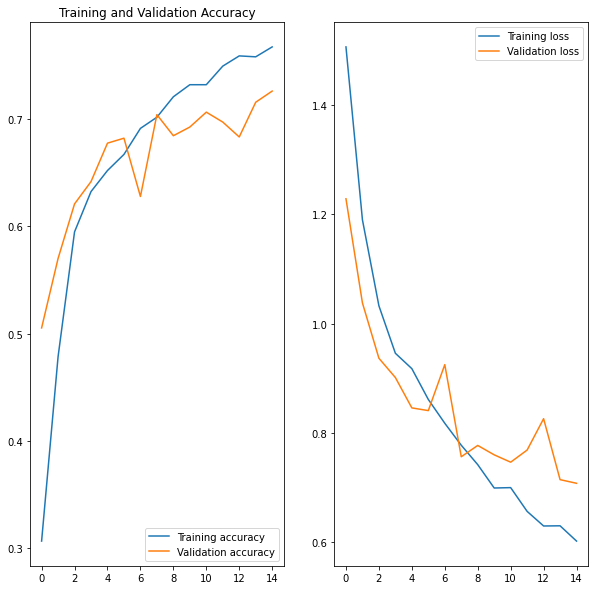

In [11]:
acc = history_1.history["accuracy"]
val_acc = history_1.history["val_accuracy"]

loss = history_1.history["loss"]
val_loss = history_1.history["val_loss"]

epochs_range = range(epochs)

plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.plot(epochs_range, acc, label="Training accuracy")
plt.plot(epochs_range, val_acc, label="Validation accuracy")
plt.legend(loc="lower right")
plt.title("Training and Validation Accuracy")

plt.subplot(1,2,2)
plt.plot(epochs_range, loss, label="Training loss")
plt.plot(epochs_range, val_loss, label="Validation loss")
plt.legend(loc="upper right")
plt.show()

In [12]:
model.save("niceflowers.h5")